In [37]:
import cv2 # cv2是open-cv在python上的wrapper
import random
import time
import numpy as np
import pandas as pd
from scipy import misc

from matplotlib import pyplot as plt
from scipy import misc
%matplotlib inline
plt.style.use('ggplot')
import os
import sys
sys.path.append('../common/')
import utils

In [38]:
# 与本项目无关，就是查看一下运行环境
import os
os.sys.path

['/Users/s4467575/Documents/jun/AI/deep_learning/CNN/Lesson1_simple_face/pre_CNN',
 '/Users/s4467575/anaconda3/lib/python37.zip',
 '/Users/s4467575/anaconda3/lib/python3.7',
 '/Users/s4467575/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/Users/s4467575/anaconda3/lib/python3.7/site-packages',
 '/Users/s4467575/anaconda3/lib/python3.7/site-packages/aeosa',
 '/Users/s4467575/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/s4467575/.ipython',
 '../common/',
 '../common/',
 '../common/']

In [39]:
# 与本项目无关，就是查看一下运行环境
?cv2.calcHist # ?  查看如何使用该函数
??cv2.calcHist # 如果该函数是python 实现的，??可以显示该函数的具体实现的源代码

Object `cv2.calcHist # ?  查看如何使用该函数` not found.
Object `cv2.calcHist # 如果该函数是python 实现的，??可以显示该函数的具体实现的源代码` not found.


In [40]:
import pickle

In [41]:
# IM_train: 58512个 （100 * 100 * 3）矩阵
# y_train: 58512个 实数 代表图片的标签. 0：代表非人脸 1：代表人脸
# IM_test: 200个 （250 * 250 * 3）的矩阵
with open('./xy.pkl','rb') as whdl:   # whdl表示文件句柄
    (IM_train,y_train,IM_test) = pickle.load(whdl)

# 分析和查看数据 

In [42]:
len(IM_train),len(y_train), len(IM_test)

(58512, 58512, 200)

In [43]:
IM_train[0].shape, y_train[0], IM_test[0].shape

((100, 100, 3), 0, (250, 250, 3))

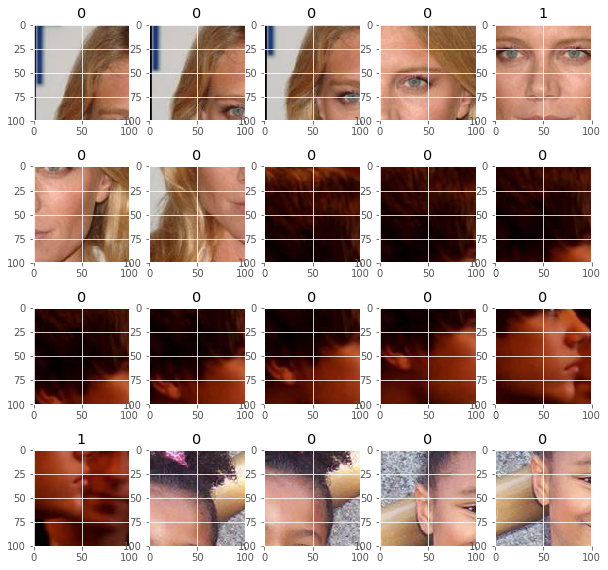

In [44]:
# 查看一下一些训练集中的原始图片， 图片上的数字表示图片的label
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5, i + 1) # 4 row, 5 column, i+1表示图片的编号
    plt.imshow(IM_train[i * 10])
    plt.title(y_train[i * 10])

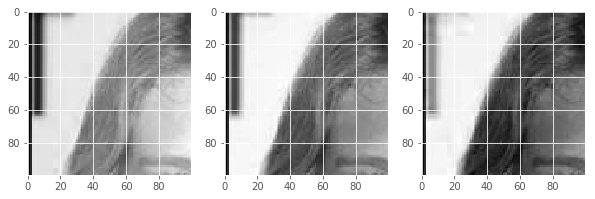

In [45]:
# 查看训练集中第一张图片，三个色道灰度图
plt.figure(figsize=(10, 10))
for i in range(3): # i: 0:blue, 1:green, 2:red
    plt.subplot(1, 3, i + 1)
    plt.imshow(IM_train[0][:, :, i], cmap = 'gray') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xb23e8aac8>]],
      dtype=object)

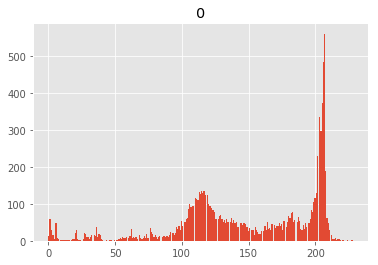

In [46]:
# 使用pandas直方图统计某一张训练图片的颜色分布
# Note: pandas hist方法直接画出直方图，而cv2.calcHist是返回一个直方图对象
pd.DataFrame(IM_train[0][:,:,0].reshape(-1)).hist(bins=255) # 0 ~ 255  0:blue, 1:green, 2:red

In [91]:
pd.DataFrame(IM_train[0][:,:,0]) # 查看一张图片 特定色道的矩阵

0   1   2    3    4    5    6    7    8    9  ...    90   91   92   93  \
0    4   0   0   68   27   13   17   14   19   22 ...    97   96   91   86   
1    3   1   3   78   39   19   18   12   21   32 ...   104   94   86   80   
2    4   2  10   92   51   24   19   14   32   52 ...   108   99   94   92   
3    6   3  15  102   61   28   21   16   43   66 ...   107  103  101   98   
4    7   4  17  108   64   28   21   21   46   74 ...   107   98   89   83   
5    8   4  18  111   68   27   22   26   53   85 ...   103   89   76   71   
6    9   4  21  115   72   28   22   28   55   91 ...    97   87   79   76   
7   11   6  22  121   77   30   23   30   50   90 ...    93   88   84   78   
8   10   6  21  118   76   33   27   32   56   92 ...    95   85   76   68   
9    8   6  21  118   76   34   27   32   58   93 ...    84   68   61   61   
10   8   4  21  116   76   34   28   32   58   93 ...    84   74   68   65   
11   7   4  20  116   74   34   28   33   59   94 ...    87   81   76   69   
12   6   3  19  116   74   34   26   32   59   95 ...    89   79   73   69   
13   7   1  19  116   74   34   27   32   60   96 ...   103   97   90   81   
14   5   2  18  114   72   32   26   33   60   95 ...   106  104   97   85   
15   5   1  18  115   73   32   26   31   58   96 ...    89   80   74   70   
16   6   1  20  117   76   35   27   33   59   96 ...    74   66   66   68   
17   6   1  20  117   76   35   27   33   60   97 ...    86   80   77   74   
18   6   1  20  117   76   35   27   33   60   97 ...    95   92   84   76   
19   6   1  20  117   76   35   27   33   60   97 ...    98   96   88   79   
20   6   1  20  117   76   35   27   33   61   98 ...   104   99   90   81   
21   6   1  20  117   76   35   27   33   61   98 ...   103   94   85   78   
22   6   1  20  117   76   35   27   33   61   98 ...    97   88   85   80   
23   6   1  20  117   76   35   27   33   61   98 ...    97   92   92   91   
24   6   1  21  118   77   36   28   34   60   97 ...   115  114  113  103   
25   6   1  21  118   77   36   28   34   61   98 ...   127  124  119  108   
26   6   1  21  118   77   36   28   34   61   98 ...   138  135  128  116   
27   6   1  21  118   77   36   28   34   61   98 ...   132  132  125  116   
28   6   1  21  118   77   36   28   34   62   99 ...   119  120  113  105   
29   6   1  21  118   77   36   28   34   62   99 ...   116  113  109  101   
..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ... ...   ...  ...  ...  ...   
70   2   1  37  203  202  204  200  201  202  202 ...   188  189  192  194   
71   4   1  37  204  203  204  201  203  203  203 ...   188  189  192  195   
72   2   1  38  202  200  203  201  203  202  202 ...   189  190  190  192   
73   4   3  40  204  202  205  203  205  204  204 ...   190  191  191  192   
74   4   3  40  204  202  205  203  205  204  204 ...   192  194  194  193   
75   4   3  40  204  202  205  203  205  204  204 ...   192  196  197  197   
76   4   3  40  204  202  205  203  205  204  204 ...   193  198  200  201   
77   5   4  41  205  203  206  204  206  205  205 ...   195  199  202  204   
78   5   4  41  205  203  206  204  206  205  205 ...   199  201  203  205   
79   5   4  41  205  203  206  204  206  205  205 ...   202  202  203  204   
80   3   1  38  202  200  203  200  202  203  203 ...   199  202  204  205   
81   3   1  38  202  200  203  200  202  203  203 ...   196  198  199  202   
82   3   1  38  202  200  203  200  202  203  203 ...   199  200  202  204   
83   3   1  38  202  200  203  200  202  203  203 ...   201  201  202  205   
84   3   1  38  202  200  203  200  202  203  203 ...   200  200  200  203   
85   3   1  38  202  200  203  200  202  203  203 ...   206  206  206  208   
86   3   1  38  202  200  203  200  202  203  203 ...   207  208  207  208   
87   3   1  38  202  200  203  200  202  203  203 ...   201  202  201  201   
88   2   1  39  204  202  205  202  204  203  203 ...   182  187  187  187   
89   2   1  39  204  202  

In [94]:
np.mean(IM_train[0], axis=2) # 100, 100, 3 求3个色道矩阵的均值

array([[  4.        ,   5.        ,  11.33333333, ...,  41.        ,
         42.        ,  43.66666667],
       [  2.66666667,   4.66666667,  15.66666667, ...,  39.        ,
         39.        ,  38.66666667],
       [  1.33333333,   4.        ,  21.        , ...,  40.        ,
         38.        ,  36.66666667],
       ...,
       [  1.        ,   0.33333333,  37.66666667, ..., 121.        ,
        108.66666667, 109.33333333],
       [  1.        ,   0.33333333,  37.66666667, ..., 127.33333333,
        124.66666667, 124.33333333],
       [  1.        ,   0.33333333,  37.66666667, ..., 122.        ,
        129.66666667, 129.33333333]])

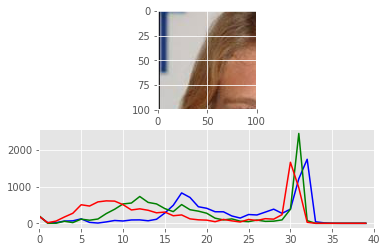

In [48]:
#histr = cv2.calcHist([IM_train[0]],[1],None,[256],[0,256])
color = ('b','g','r') # 对应 0，1， 2 三个数
plt.subplot(2,1,1)
plt.imshow(IM_train[0])
plt.subplot(2,1,2)
for i,col in enumerate(color):
    # pandas 里hist函数功能类似，只不过pandas里是直接画出来，而这里是返回一个histgram对象
    histr = cv2.calcHist([IM_train[0]],[i],None,[40],[0,256])  # 40 个bins
    plt.plot(histr,color = col)
    plt.xlim([0,40])
plt.show()

In [49]:
histr.shape # 120

(40, 1)

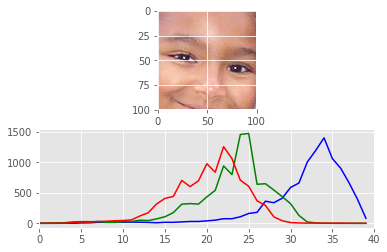

In [50]:
#histr = cv2.calcHist([IM_train[0]],[1],None,[256],[0,256])
color = ('b','g','r')
plt.subplot(2,1,1)
plt.imshow(IM_train[188])
plt.subplot(2,1,2)
for i,col in enumerate(color):
    histr = cv2.calcHist([IM_train[188]],[i],None,[40],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,40])
plt.show()

In [51]:
np.where(np.asarray(y_train)==1)[0][:10]

array([ 34,  39,  40, 145, 150, 151, 188, 192, 193, 194])

# training 过程 - 生成feature

In [52]:
pb = utils.ProgressBar(worksum=len(IM_train))
pb.startjob()
features = [] # 该list用来存储每一张图片的 feature
targets = []
for one_image,one_target in zip(IM_train,y_train):
    one_feature = []
    if len(one_image.shape) != 3:
        continue
    # 对training set里每一张图片，的每一个色道提取特征
    for i,col in enumerate(color): # color = ('b','g','r')
        # 调用calcHist生成某种色道的颜色直方图的时候 其实就是extract feature的过程
        histr = cv2.calcHist([one_image],[i],None,[40],[0,256]).T[0] # 运行?cv2.calcHist可以显示用法
        one_feature.append(histr) # 直方图即为特征，加入到one_feature list里
    
    # 内循环结束后，one_feature list有3个(40*1)的histr，将他们concat成(120*1) 之所以每个histr是40*1 因为调用calcHist函数时，用了40bins
    one_feature = np.concatenate(one_feature) 
    features.append(one_feature)# 将所有图片的feature直方图放入 features list 里面
    targets.append(one_target) # 就是某张图片的label. 0:表示非人脸 1：表示人脸
    pb.complete(1)

 2.59 % [=>-------------------------------------------------] 1513/58512 	 used:0s eta:7 s

 5.22 % [==>------------------------------------------------] 3057/58512 	 used:0s eta:7 s

 7.96 % [===>-----------------------------------------------] 4658/58512 	 used:0s eta:6 s

 10.57 % [=====>---------------------------------------------] 6187/58512 	 used:0s eta:6 s

 13.40 % [======>--------------------------------------------] 7843/58512 	 used:1s eta:6 s

 16.15 % [========>------------------------------------------] 9452/58512 	 used:1s eta:6 s

 18.86 % [=========>-----------------------------------------] 11038/58512 	 used:1s eta:6 s

 21.56 % [==========>----------------------------------------] 12613/58512 	 used:1s eta:5 s

 24.39 % [============>--------------------------------------] 14271/58512 	 used:1s eta:5 s

 26.62 % [=============>-------------------------------------] 15573/58512 	 used:2s eta:5 s

 28.72 % [==============>------------------------------------] 16805/58512 	 used:2s eta:5 s

 31.47 % [===============>-----------------------------------] 18414/58512 	 used:2s eta:5 s

 34.31 % [=================>---------------------------------] 20074/58512 	 used:2s eta:5 s

 37.22 % [==================>--------------------------------] 21778/58512 	 used:2s eta:4 s

 39.81 % [===================>-------------------------------] 23293/58512 	 used:3s eta:4 s

 41.05 % [====================>------------------------------] 24022/58512 	 used:3s eta:4 s

 43.08 % [=====================>-----------------------------] 25207/58512 	 used:3s eta:4 s

 45.21 % [======================>----------------------------] 26456/58512 	 used:3s eta:4 s

 47.33 % [=======================>---------------------------] 27695/58512 	 used:3s eta:4 s

 49.46 % [========================>--------------------------] 28938/58512 	 used:4s eta:4 s

 51.13 % [=========================>-------------------------] 29920/58512 	 used:4s eta:4 s

 53.54 % [==========================>------------------------] 31326/58512 	 used:4s eta:3 s

 55.19 % [===========================>-----------------------] 32293/58512 	 used:4s eta:3 s

 57.37 % [============================>----------------------] 33569/58512 	 used:4s eta:3 s

 59.12 % [=============================>---------------------] 34590/58512 	 used:5s eta:3 s

 61.26 % [==============================>--------------------] 35847/58512 	 used:5s eta:3 s

 63.40 % [===============================>-------------------] 37094/58512 	 used:5s eta:3 s

 65.64 % [================================>------------------] 38408/58512 	 used:5s eta:2 s

 66.93 % [=================================>-----------------] 39164/58512 	 used:5s eta:2 s

 67.47 % [=================================>-----------------] 39479/58512 	 used:6s eta:2 s

 68.28 % [==================================>----------------] 39952/58512 	 used:6s eta:2 s

 68.75 % [==================================>----------------] 40225/58512 	 used:6s eta:2 s

 71.14 % [===================================>---------------] 41628/58512 	 used:6s eta:2 s

 73.98 % [====================================>--------------] 43285/58512 	 used:6s eta:2 s

 76.82 % [======================================>------------] 44946/58512 	 used:7s eta:2 s

 79.14 % [=======================================>-----------] 46305/58512 	 used:7s eta:1 s

 81.14 % [========================================>----------] 47474/58512 	 used:7s eta:1 s

 84.01 % [==========================================>--------] 49158/58512 	 used:7s eta:1 s

 86.81 % [===========================================>-------] 50795/58512 	 used:7s eta:1 s

 89.65 % [============================================>------] 52454/58512 	 used:8s eta:0 s

 92.39 % [==============================================>----] 54061/58512 	 used:8s eta:0 s

 95.17 % [===============================================>---] 55684/58512 	 used:8s eta:0 s

 97.86 % [================================================>--] 57261/58512 	 used:8s eta:0 s

 99.76 % [=================================================>-] 58371/58512 	 used:8s eta:0 s

In [53]:
len(features),len(targets)

(58371, 58371)

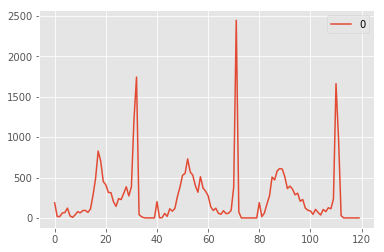

In [54]:
pd.DataFrame(features[0]).plot() #  查看training date 里第一张图片的直方图

In [55]:
# train, validation set split
train_x,val_x = features[:-10000], features[-10000:] # 最后10000图片用来做validation
train_y,val_y = targets[:-10000], targets[-10000:]

In [56]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [57]:
lr = LogisticRegression()

In [58]:
lr_model = lr.fit(train_x,train_y)

/Users/s4467575/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
pred = lr_model.predict_proba(val_x)

In [71]:
pred.shape

(10000, 2)

In [96]:
pred
# 每一行：0列： 预测负例的概率， 1列：预测为正例的概率

array([[0.99873988, 0.00126012],
       [0.99538715, 0.00461285],
       [0.97445534, 0.02554466],
       ...,
       [0.95672038, 0.04327962],
       [0.90754026, 0.09245974],
       [0.86768479, 0.13231521]])

In [75]:
val_pred=pred[:,1]
val_pred

array([0.00126012, 0.00461285, 0.02554466, ..., 0.04327962, 0.09245974,
       0.13231521])

In [79]:
from sklearn import metrics

Object `roc_curve` not found.


In [81]:
?metrics.roc_curve

In [97]:
#??? 为什么只挑选了val_pred  和所有的val_y 来计算。根据文档 roc_curve 里 val_y 应该是true binary label
# val_y 是所有validation test sample 里的实际label, 
# val_pred,  是针对validation test sample, 用我们的模型预测出来为正例的概率
fpr, tpr, thresholds = metrics.roc_curve(val_y, val_pred, pos_label = 1)

In [78]:
metrics.auc(fpr, tpr) # AUC 曲线下面的面积

0.8014728184144351

# Test 

In [28]:
def get_feature(input_img):
    one_feature = []
    for i,col in enumerate(color):
        histr = cv2.calcHist([input_img],[i],None,[40],[0,256]).T[0]
        one_feature.append(histr)
    one_feature = np.concatenate(one_feature)

    return one_feature

In [34]:
sample_image = np.copy(IM_test[23])
sample_image.shape

(250, 250, 3)

In [33]:
sample_image.reshape(-1).shape

(187500,)

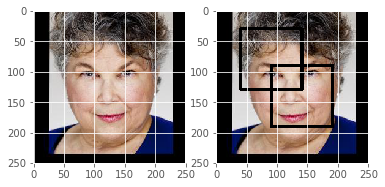

In [88]:
plt.subplot(1,2,1)
plt.imshow(sample_image)
"""
    之所以用来两个for循环 是为了把250 * 250的图片，切割成若干个100 * 100 大小的框，然后针对每个100*100大小的框进行人脸判断
    而不是直接对一个250*250大小的图片判断.
    
    之所以要这么做，因为我们training 的时候用的是100*100大小的图片进行训练的
    
""" 
for i in range(0,250 - 100,10): # i 从0 到140，步长是10。i.e. 0, 10, 20....130,140
    for j in range(0,250 - 100,10): # j 从0 到140，步长是10。i.e. 0, 10, 20....130,140
        one_feature = get_feature(sample_image[i:i + 100,j:j + 100]) # 只针对100*100大小的框来
        result = lr_model.predict_proba([one_feature])
        #print(result)
        if result[0][1] > 0.1:
            # 把区域 框出来
            cv2.rectangle(sample_image,(i,j),(i + 100,j + 100),(0,0,0),3)
plt.subplot(1,2,2)
plt.imshow(sample_image)

In [89]:
result

array([[9.99630328e-01, 3.69672495e-04]])